## Laboratorio: Usos reales de la morfología matemática

# Objetivos de la actividad

Este laboratorio persigue un objetivo sencillo. Dada la siguiente imagen, contar el número de círculos que presenta la imagen. 

# Inicialización

In [3]:
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_peaks, corner_harris,
                             plot_matches, BRIEF, ORB)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [4]:
# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing
# Elementos estructurales
from skimage.morphology import disk, diamond, ball, rectangle

In [5]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola

from skimage.morphology import label
from skimage.measure import regionprops

In [57]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

## Cargar la imagen

In [58]:
pintura_puntos = rgb2gray(data.imread('Pintura_Puntos.jpg'))

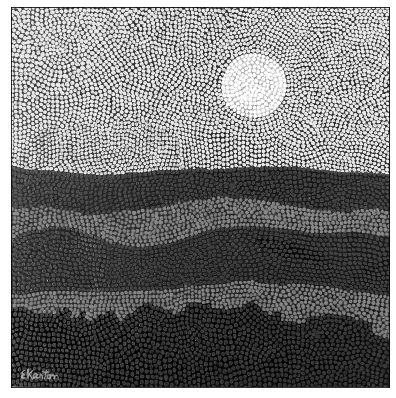

In [59]:
imshow(pintura_puntos)

# Prueba de los operadores de threshold (Umbralización)

Las operaciones de filtrado por umbrales probadas para el laboratorio corresponden a las siguientes:

 - <b>threshold_otsu:</b> Este operador calcula el valor umbral de forma que la dispersión dentro de cada segmento sea lo más pequeña posible, pero al mismo tiempo la dispersión sea lo más alta posible entre segmentos diferentes. Para ello se calcula el cociente entre ambas variancias y se busca un valor umbral para el que este cociente sea máximo. (Fuente: Wikipedia)

 - <b>threshold_local:</b> Corresponde al valor de umbral adaptativo o dinámico. El valor umbral es la media ponderada para la vecindad local de un píxel sustraído por una constante. (Fuente: skimage) 

 - <b>threshold_niblack:</b> En el método de niblacke n lugar de calcular un umbral global único para toda la imagen, se calculan varios umbrales para cada píxel utilizando fórmulas que tienen en cuenta la media y la desviación estándar del vecindario local (definido por una ventana centrada alrededor del píxel). (Fuente: skimage)

 - <b>threshold_sauvola:</b> Es una variación del método de Niblack, en donde se varia la fórmula de cálculo de pixel con la fórmula: pixel = ( pixel > mean * ( 1 + k * ( standard_deviation / r - 1 ) ) )    

###  Prueba de threshold_otsu

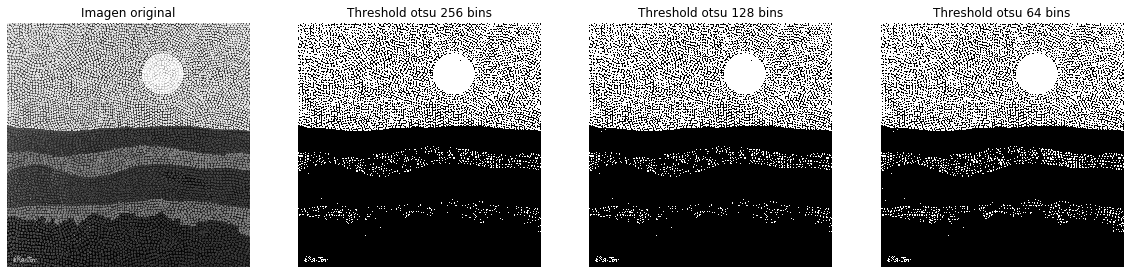

In [83]:
#Parámetros del método: (image, nbins=256)

# Para realizar la prueba von el filtro se varia el número de bins

imagenOtsu1 = threshold_otsu(pintura_puntos,nbins=256)
imagenOtsu2 = threshold_otsu(pintura_puntos,nbins=128)
imagenOtsu3 = threshold_otsu(pintura_puntos,nbins=64)

binary1_otsu = pintura_puntos > imagenOtsu1
binary2_otsu = pintura_puntos > imagenOtsu2
binary3_otsu = pintura_puntos > imagenOtsu3

fig, axes = plt.subplots(ncols=4, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(pintura_puntos, cmap=plt.cm.gray)
ax[0].set_title('Imagen original')
ax[0].axis('off')

ax[1].imshow(binary1_otsu , cmap=plt.cm.gray)
ax[1].set_title('Threshold otsu 256 bins')
ax[1].axis('off')

ax[2].imshow(binary2_otsu , cmap=plt.cm.gray)
ax[2].set_title('Threshold otsu 128 bins')
ax[2].axis('off')

ax[3].imshow(binary3_otsu , cmap=plt.cm.gray)
ax[3].set_title('Threshold otsu 64 bins')
ax[3].axis('off')

plt.show()

<b>Resultado</b>:
Se puede observar que este filtro diferencia bien los puntos oscuros en las zonas claras, pero no lo hace también en las zonas oscuras. No se precibe una gran diferencia en la variación de parámetros de beans.

### Prueba de threshold_local

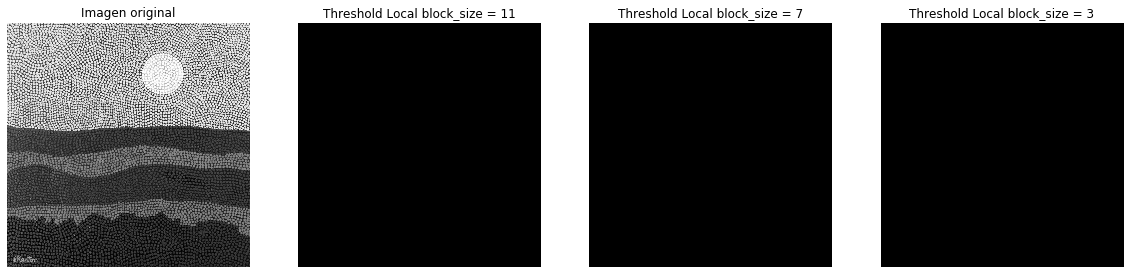

In [84]:
#Parámetros del método: (image, block_size, method='gaussian', offset=0, mode='reflect', param=None, cval=0)
imagenLocal = threshold_local(pintura_puntos, block_size= 11, offset =10)

# Para realizar la prueba von el filtro se varia el número de bins

imagenLocal1 = threshold_local(pintura_puntos, block_size= 11, offset =10)
imagenLocal2 = threshold_local(pintura_puntos, block_size= 7, offset = 10)
imagenLocal3 = threshold_local(pintura_puntos, block_size= 3, offset = 10)

binary1_local  = pintura_puntos > imagenLocal1
binary2_local = pintura_puntos > imagenLocal2
binary3_local = pintura_puntos > imagenLocal3

fig, axes = plt.subplots(ncols=4, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(pintura_puntos, cmap=plt.cm.gray)
ax[0].set_title('Imagen original')
ax[0].axis('off')

ax[1].imshow(binary1_local, cmap=plt.cm.gray)
ax[1].set_title('Threshold Local block_size = 11')
ax[1].axis('off')

ax[2].imshow(binary2_local, cmap=plt.cm.gray)
ax[2].set_title('Threshold Local block_size = 7')
ax[2].axis('off')

ax[3].imshow(binary3_local, cmap=plt.cm.gray)
ax[3].set_title('Threshold Local block_size = 3')
ax[3].axis('off')

plt.show()

<b>Resultado</b>:
Se puede observar que este filtro se genera un sobremuestreo que opaca totalmente la imagen.

### Prueba de threshold_niblack 

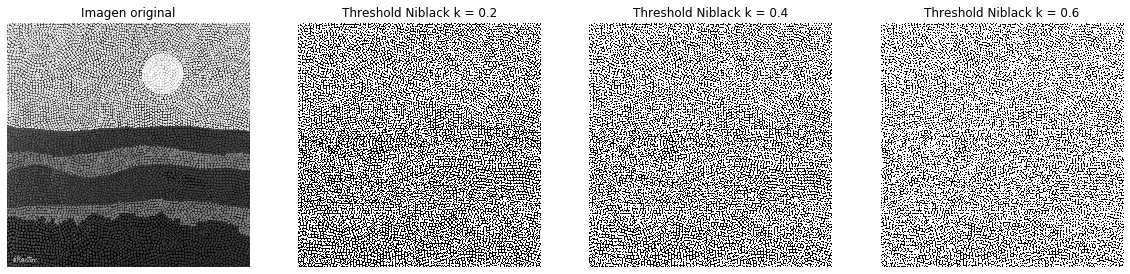

In [85]:
#Parámetros del método: (image, window_size=15, k=0.2)
imagenNiblack = threshold_niblack(pintura_puntos)

imagenNiblack1 = threshold_niblack(pintura_puntos, window_size=15, k=0.2)
imagenNiblack2 = threshold_niblack(pintura_puntos, window_size=15, k=0.4)
imagenNiblack3 = threshold_niblack(pintura_puntos, window_size=15, k=0.6)

binary1_niblack = pintura_puntos > imagenNiblack1
binary2_niblack = pintura_puntos > imagenNiblack2
binary3_niblack = pintura_puntos > imagenNiblack3

fig, axes = plt.subplots(ncols=4, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(pintura_puntos, cmap=plt.cm.gray)
ax[0].set_title('Imagen original')
ax[0].axis('off')

ax[1].imshow(binary1_niblack, cmap=plt.cm.gray)
ax[1].set_title('Threshold Niblack k = 0.2')
ax[1].axis('off')

ax[2].imshow(binary2_niblack, cmap=plt.cm.gray)
ax[2].set_title('Threshold Niblack k = 0.4')
ax[2].axis('off')

ax[3].imshow(binary3_niblack, cmap=plt.cm.gray)
ax[3].set_title('Threshold Niblack k = 0.6')
ax[3].axis('off')

plt.show()

<b>Resultado</b>:
Se puede observar que este filtro se aclaran mejor los puntos, segmentando mejor las zonas oscuras que simobolizan los puntos. Se percibe que el parámetro k = 0.2 genera una mejor segmentación.

### Prueba de threshold_sauvola. 

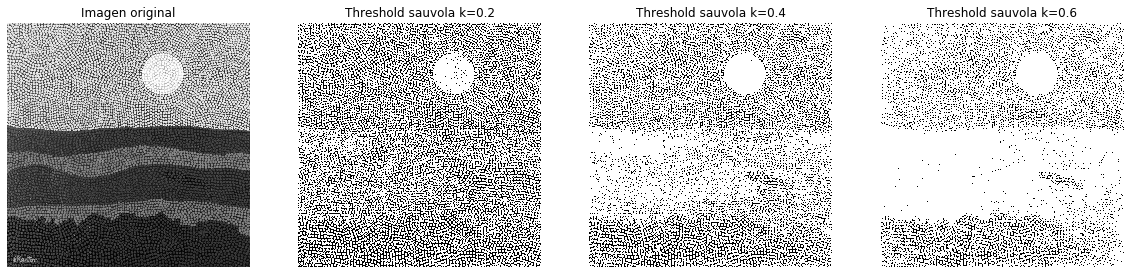

In [86]:
#Parámetros del método: (image, window_size=15, k=0.2, r=None)
imagenSauvola = threshold_sauvola(pintura_puntos)

imagenSauvola1 = threshold_sauvola(pintura_puntos, window_size=15, k=0.2)
imagenSauvola2 = threshold_sauvola(pintura_puntos, window_size=15, k=0.4)
imagenSauvola3 = threshold_sauvola(pintura_puntos, window_size=15, k=0.6)

binary1_sauvola = pintura_puntos > imagenSauvola1
binary2_sauvola = pintura_puntos > imagenSauvola2
binary3_sauvola = pintura_puntos > imagenSauvola3

fig, axes = plt.subplots(ncols=4, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(pintura_puntos, cmap=plt.cm.gray)
ax[0].set_title('Imagen original')
ax[0].axis('off')

ax[1].imshow(binary1_sauvola, cmap=plt.cm.gray)
ax[1].set_title('Threshold sauvola k=0.2')
ax[1].axis('off')

ax[2].imshow(binary2_sauvola, cmap=plt.cm.gray)
ax[2].set_title('Threshold sauvola k=0.4')
ax[2].axis('off')

ax[3].imshow(binary3_sauvola, cmap=plt.cm.gray)
ax[3].set_title('Threshold sauvola k=0.6')
ax[3].axis('off')

plt.show()

<b>Resultado</b>:
Se puede observar que este filtro se aclaran mejor los puntos, segmentando mejor las zonas oscuras que simobolizan los puntos. Se percibe que el parámetro k = 0.6 genera una mejor segmentación. Se evidencia problemas para segementar los puntos en la zona clara.

<b>Conclusión general</b>:
Se puede observar los filtros que mejor logran segementar los puntos corresponde a Niblack y sauvola. El filtro Sauvola tiene un problema con la identificación de los puntos en las zonas claras. Se toma el filtro Niblack para continuarcon el procesamiento.

##  Aplicación de morfologías

Para aplicar las morfologías sobre la imagen se consideran las siguientes:

 - Erosión
 - Dilatación
 - Opening
 - Closing
 
En este caso el patrón base será circular en primera instancia dado que ese es el patrón observado en la imagén. 

### Prueda de dilatación 

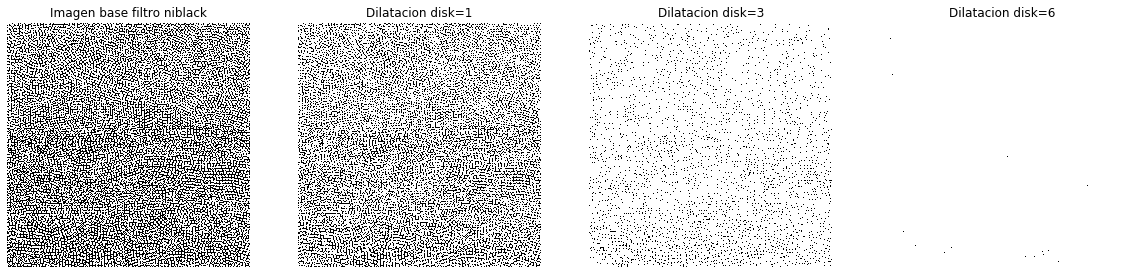

In [135]:
fig, axes = plt.subplots(ncols=4, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(binary1_niblack, cmap=plt.cm.gray)
ax[0].set_title('Imagen base filtro niblack')
ax[0].axis('off')

ax[1].imshow(dilation(binary1_niblack, selem = disk(1)), cmap=plt.cm.gray)
ax[1].set_title('Dilatacion disk=1')
ax[1].axis('off')

ax[2].imshow(dilation(binary1_niblack, selem = disk(3)), cmap=plt.cm.gray)
ax[2].set_title('Dilatacion disk=3')
ax[2].axis('off')

ax[3].imshow(dilation(binary1_niblack, selem = disk(6)), cmap=plt.cm.gray)
ax[3].set_title('Dilatacion disk=6')
ax[3].axis('off')

plt.show()

<b>Resultado</b>:
Se puede observar que el flitro de dilatación genera una pérdida de puntos en la imagen. Los valores más altos del tamaño del disco generan una pérdidad total de los puntos.

### Prueda de Erosión 

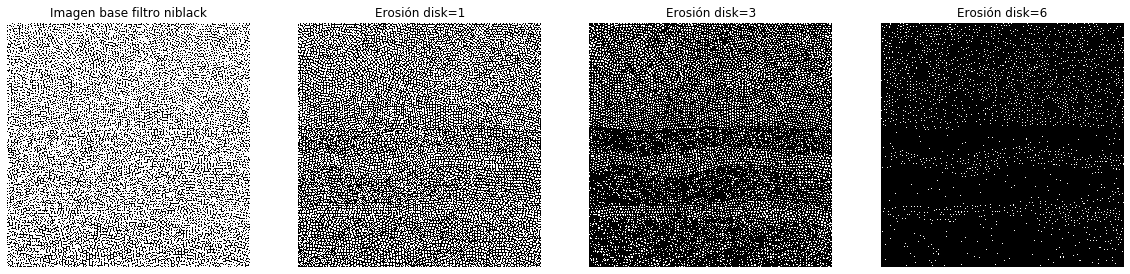

In [136]:
fig, axes = plt.subplots(ncols=4, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(binary3_niblack, cmap=plt.cm.gray)
ax[0].set_title('Imagen base filtro niblack')
ax[0].axis('off')

ax[1].imshow(erosion(binary1_niblack, selem = disk(1)), cmap=plt.cm.gray)
ax[1].set_title('Erosión disk=1')
ax[1].axis('off')

ax[2].imshow(erosion(binary1_niblack, selem = disk(3)), cmap=plt.cm.gray)
ax[2].set_title('Erosión disk=3')
ax[2].axis('off')

ax[3].imshow(erosion(binary1_niblack, selem = disk(6)), cmap=plt.cm.gray)
ax[3].set_title('Erosión disk=6')
ax[3].axis('off')

plt.show()

<b>Resultado</b>:
Se puede observar que el filtro de erosión genera un realce de los puntos negros pero solo con un buen resutaldo para el valor de tamaño de disco = 1

### Prueda de Opening 

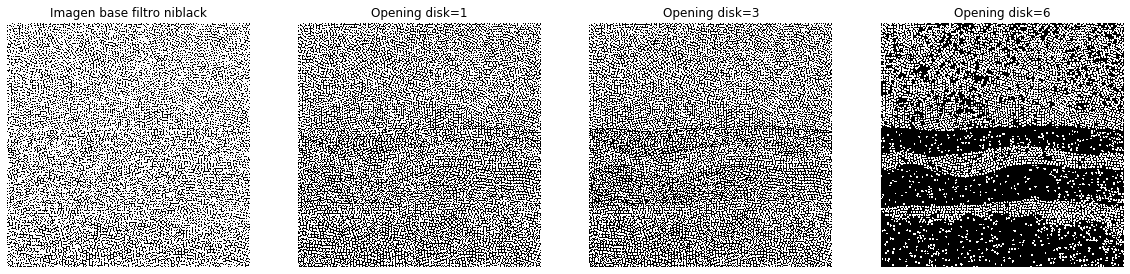

In [137]:
fig, axes = plt.subplots(ncols=4, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(binary3_niblack, cmap=plt.cm.gray)
ax[0].set_title('Imagen base filtro niblack')
ax[0].axis('off')

ax[1].imshow(opening(binary1_niblack, selem = disk(1)), cmap=plt.cm.gray)
ax[1].set_title('Opening disk=1')
ax[1].axis('off')

ax[2].imshow(opening(binary1_niblack, selem = disk(3)), cmap=plt.cm.gray)
ax[2].set_title('Opening disk=3')
ax[2].axis('off')

ax[3].imshow(opening(binary1_niblack, selem = disk(6)), cmap=plt.cm.gray)
ax[3].set_title('Opening disk=6')
ax[3].axis('off')

plt.show()

<b>Resultado</b>:
Se puede observar que el filtro de opening genera una buena segementación de los puntos negros para los valores del tamaño de disco entre 1 y 3.

### Prueda de closing

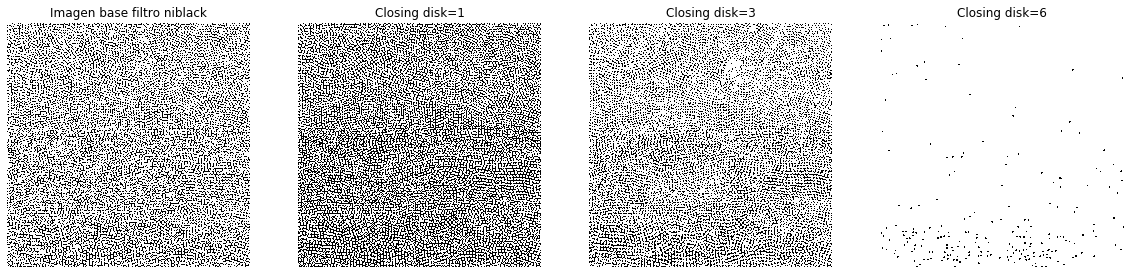

In [138]:
fig, axes = plt.subplots(ncols=4, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(binary3_niblack, cmap=plt.cm.gray)
ax[0].set_title('Imagen base filtro niblack')
ax[0].axis('off')

ax[1].imshow(closing(binary1_niblack, selem = disk(1)), cmap=plt.cm.gray)
ax[1].set_title('Closing disk=1')
ax[1].axis('off')

ax[2].imshow(closing(binary1_niblack, selem = disk(3)), cmap=plt.cm.gray)
ax[2].set_title('Closing disk=3')
ax[2].axis('off')

ax[3].imshow(closing(binary1_niblack, selem = disk(6)), cmap=plt.cm.gray)
ax[3].set_title('Closing disk=6')
ax[3].axis('off')

plt.show()

<b>Resultado</b>:
Se puede observar que el filtro de closing genera una segmentación que mejora en algunas delas áreas pero solo con el tamaño de disco = 1

### Conclusión aplicación de operadores morfológicos

Al aplicar los cuatro tipos de operadores morfológicos se obsevra que se tienen buenos resultados los operadores de opening y closing con paramétros de tamaño de disco pequeños.

# Conteo de puntos en la imagen

Para realizar el conteo de puntos en la imante obtenida, se utiliza la función label mediante la cual se identifican regiones conectadas en una matriz de puntos. Esta función establece que dos puntos están conectados cuando son vecinos y tienen el mismo valor.

Se realiza una comparacion del número de parámetros obenitos con difentes resultados del umbral niblack y el tamaño del disco

In [177]:
# Niblack 1 disk 1
imagen_closing = label(closing(binary1_niblack, selem = disk(1)), connectivity=dilated.ndim)
imagen_opening = label(opening(binary1_niblack, selem = disk(1)), connectivity=dilated.ndim)
imagen_dilation = label(dilation(binary1_niblack, selem = disk(1)), connectivity=dilated.ndim)
imagen_erosion = label(erosion(binary1_niblack, selem = disk(1)), connectivity=dilated.ndim)

print ("puntos con closing + niblack: " + str(len(regionprops(imagen_closing))))
print ("puntos con opening + niblack: " + str(len(regionprops(imagen_opening))))
print ("puntos con dilation + niblack: " + str(len(regionprops(imagen_dilation))))
print ("puntos con erosion + niblack: " + str(len(regionprops(imagen_erosion))))

puntos con closing + niblack: 4227
puntos con opening + niblack: 5480
puntos con dilation + niblack: 2756
puntos con erosion + niblack: 6014


In [179]:
# Niblack 1 disk 2
imagen_closing = label(closing(binary1_niblack, selem = disk(2)), connectivity=dilated.ndim)
imagen_opening = label(opening(binary1_niblack, selem = disk(2)), connectivity=dilated.ndim)
imagen_dilation = label(dilation(binary1_niblack, selem = disk(2)), connectivity=dilated.ndim)
imagen_erosion = label(erosion(binary1_niblack, selem = disk(2)), connectivity=dilated.ndim)

print ("puntos con closing + niblack: " + str(len(regionprops(imagen_closing))))
print ("puntos con opening + niblack: " + str(len(regionprops(imagen_opening))))
print ("puntos con dilation + niblack: " + str(len(regionprops(imagen_dilation))))
print ("puntos con erosion + niblack: " + str(len(regionprops(imagen_erosion))))

puntos con closing + niblack: 950
puntos con opening + niblack: 5711
puntos con dilation + niblack: 98
puntos con erosion + niblack: 6925


In [181]:
# Niblack 1 disk 3
imagen_closing = label(closing(binary1_niblack, selem = disk(3)), connectivity=dilated.ndim)
imagen_opening = label(opening(binary1_niblack, selem = disk(3)), connectivity=dilated.ndim)
imagen_dilation = label(dilation(binary1_niblack, selem = disk(3)), connectivity=dilated.ndim)
imagen_erosion = label(erosion(binary1_niblack, selem = disk(3)), connectivity=dilated.ndim)

print ("puntos con closing + niblack: " + str(len(regionprops(imagen_closing))))
print ("puntos con opening + niblack: " + str(len(regionprops(imagen_opening))))
print ("puntos con dilation + niblack: " + str(len(regionprops(imagen_dilation))))
print ("puntos con erosion + niblack: " + str(len(regionprops(imagen_erosion))))

puntos con closing + niblack: 217
puntos con opening + niblack: 6438
puntos con dilation + niblack: 1
puntos con erosion + niblack: 10223


### Conclusión 

Se puede observa qeu el mayor número de puntos correspondiente a 10.223 se obtiene utilizando la imagen con la función de umbral niblack con k = 0.2 y el operador morfológico erosion con un tamaño de disco = 3.